## **Reducción de dimensionalidad / PCA (Core)**

### **PCA (Core)**

#### **Reducción de Dimensionalidad**

**Descripción:**

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

**Enlace al dataset:** https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



### **Objetivo:**

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.



### **Instrucciones:**

1. **Carga de datos:**
    - Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
    - El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

2. **Exploración y preprocesamiento de datos:**
    - Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
    - Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

3. **Aplicación de PCA:**
    - Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
    - Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

4. **Interpretación de los componentes principales:**
    - Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
    - Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

5. **Visualización y comparación:**
    - Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
    - Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

6. **Análisis de Resultados:**

    - Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad. 
    - Discute la importancia de las variables que más contribuyen a los primeros componentes.
    - Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.



### **Conclusión:**

Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.

Importamos las librerias necesarias

In [1]:
import os
import pandas as pd
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import kagglehub
import kaggle

In [2]:
# Descargar el dataset
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
print("Path to dataset files:", path)
# Cargar el dataset
dataset_path = os.path.join(path, "winequality-red.csv")
df = pd.read_csv(dataset_path)

Path to dataset files: C:\Users\guill\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2


### **Exploratory Data Analysis**

In [3]:
print("Dimensiones del dataset:")
print(f"Features: {df.shape[1]}, Ejemplos: {df.shape[0]}")
print("Primeras 5 filas del dataset:")
df.head()

Dimensiones del dataset:
Features: 12, Ejemplos: 1599
Primeras 5 filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### **Analisis de duplicados**

Contamos los duplicados

In [4]:
duplicados = df.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 240


In [5]:
# Eliminar duplicados y actualizar el DataFrame
data = df.drop_duplicates()

# Identificar duplicados nuevamente
duplicados = data.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados después de eliminarlos: {num_duplicados}")

Número de registros duplicados después de eliminarlos: 0


Eliminamos los duplicados, esto puede generar que nuestra prediccion sea favorable a cierto grupo y no queremos eso

#### **Analisis de distribucion de las variables**

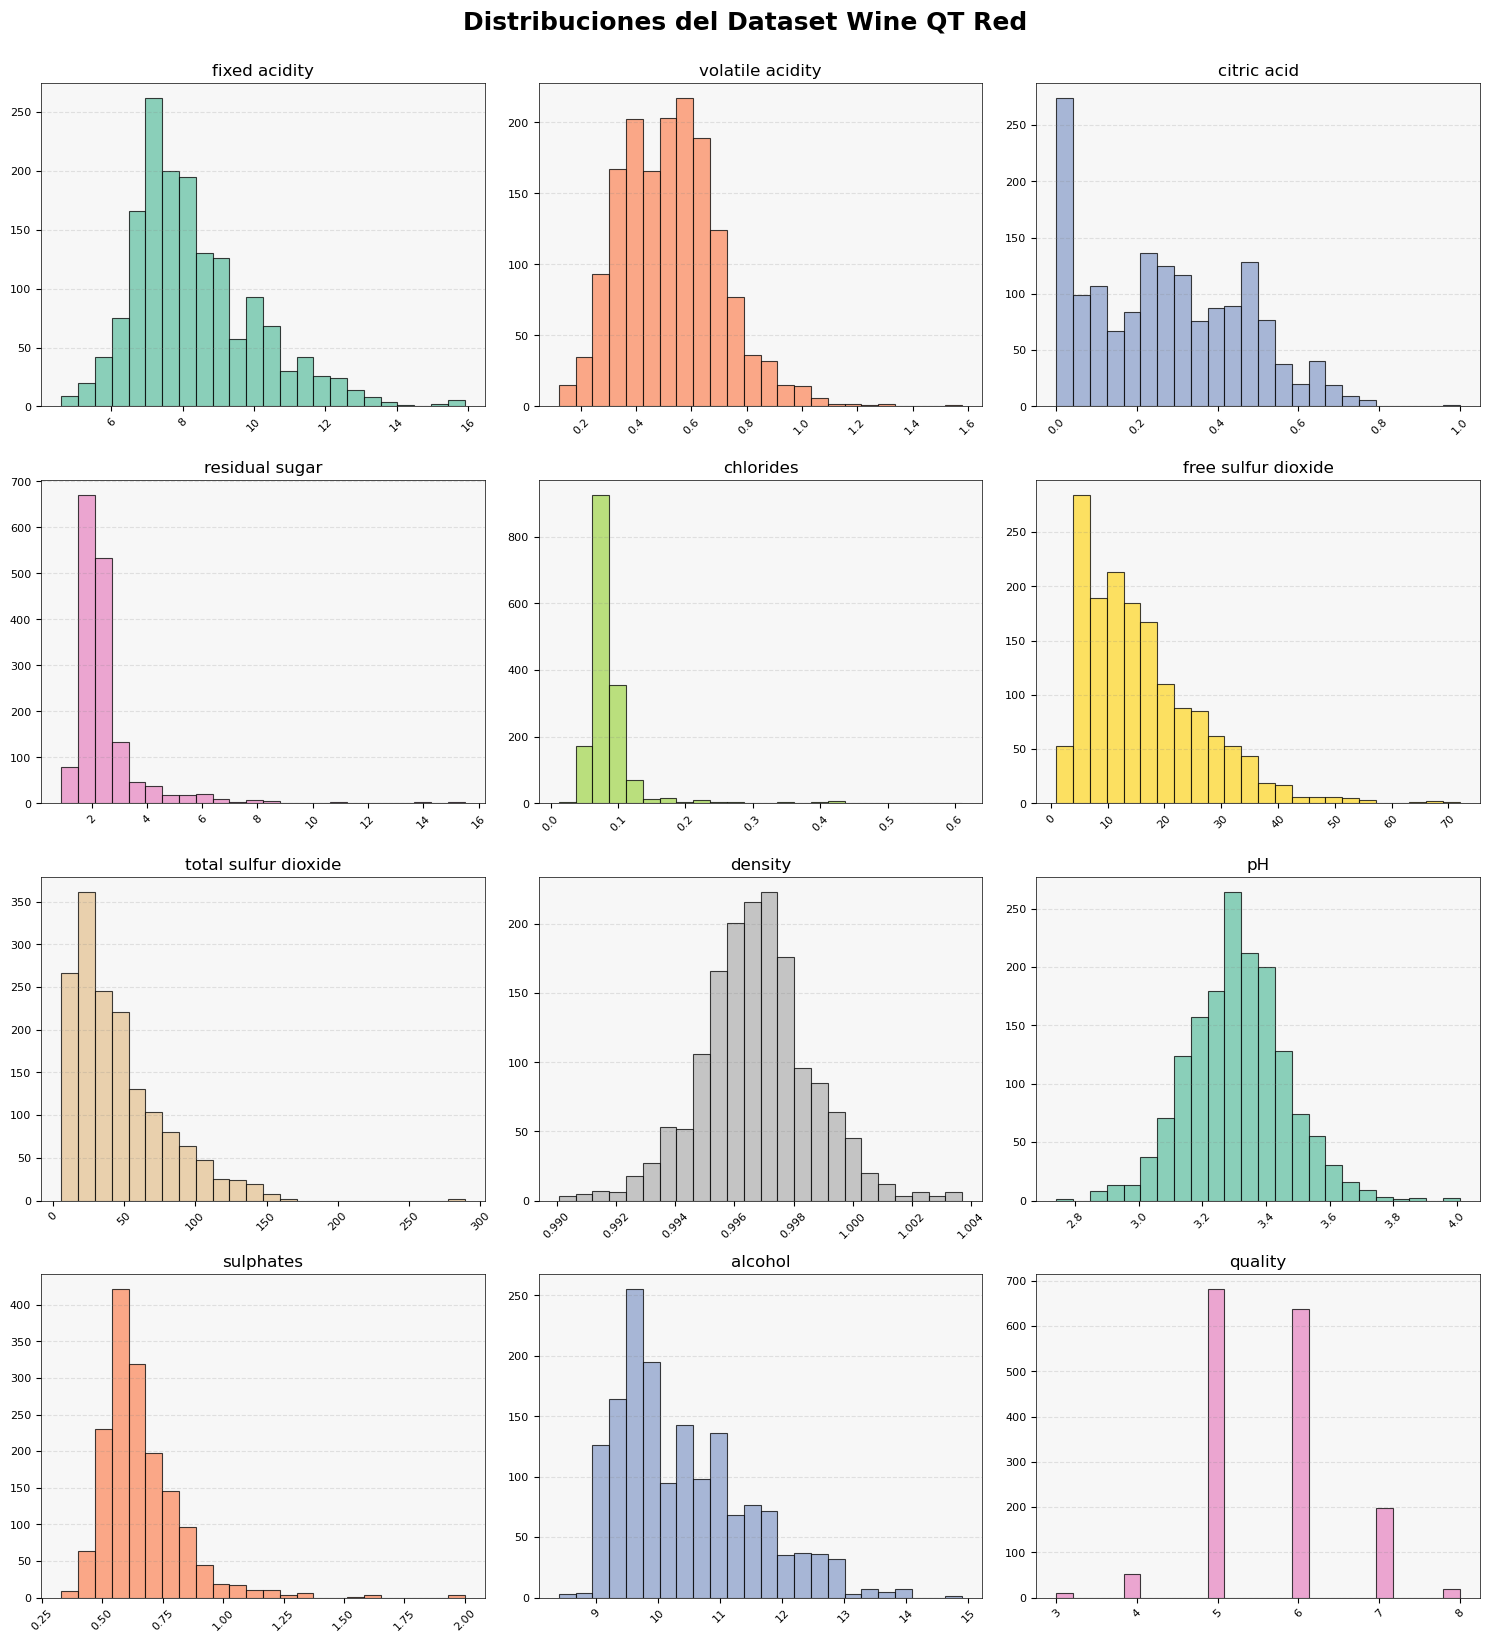

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20)) 
axes = axes.flatten()

colors = sns.color_palette("Set2", len(df.columns))
for i, col in enumerate(df.columns):
    if i < len(axes):  
         # Cambiar a ax.hist()
        axes[i].hist(df[col].dropna(), bins='rice', color=colors[i], alpha=0.75, edgecolor='black', linewidth=0.8)
        
        # Estética
        axes[i].set_title(col, fontsize=12, pad=5)
        axes[i].grid(axis='y', linestyle='--', color='gray', alpha=0.2)
        axes[i].set_facecolor('#f7f7f7')
        axes[i].spines['top'].set_color('black')
        axes[i].spines['top'].set_linewidth(0.5)
        axes[i].spines['right'].set_color('black')
        axes[i].spines['right'].set_linewidth(0.5)
        axes[i].spines['left'].set_color('black')
        axes[i].spines['left'].set_linewidth(0.5)
        axes[i].spines['bottom'].set_color('black')
        axes[i].spines['bottom'].set_linewidth(0.5)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8, colors='black')
        axes[i].tick_params(axis='y', labelsize=8, colors='black')

# Eliminar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general y espaciado
fig.suptitle('Distribuciones del Dataset Wine QT Red', fontsize=18, fontweight='bold', y= 1)
plt.tight_layout()
plt.show()


Explicacion

#### **Pairplot de variables en base a categorias**

<Figure size 2000x1500 with 0 Axes>

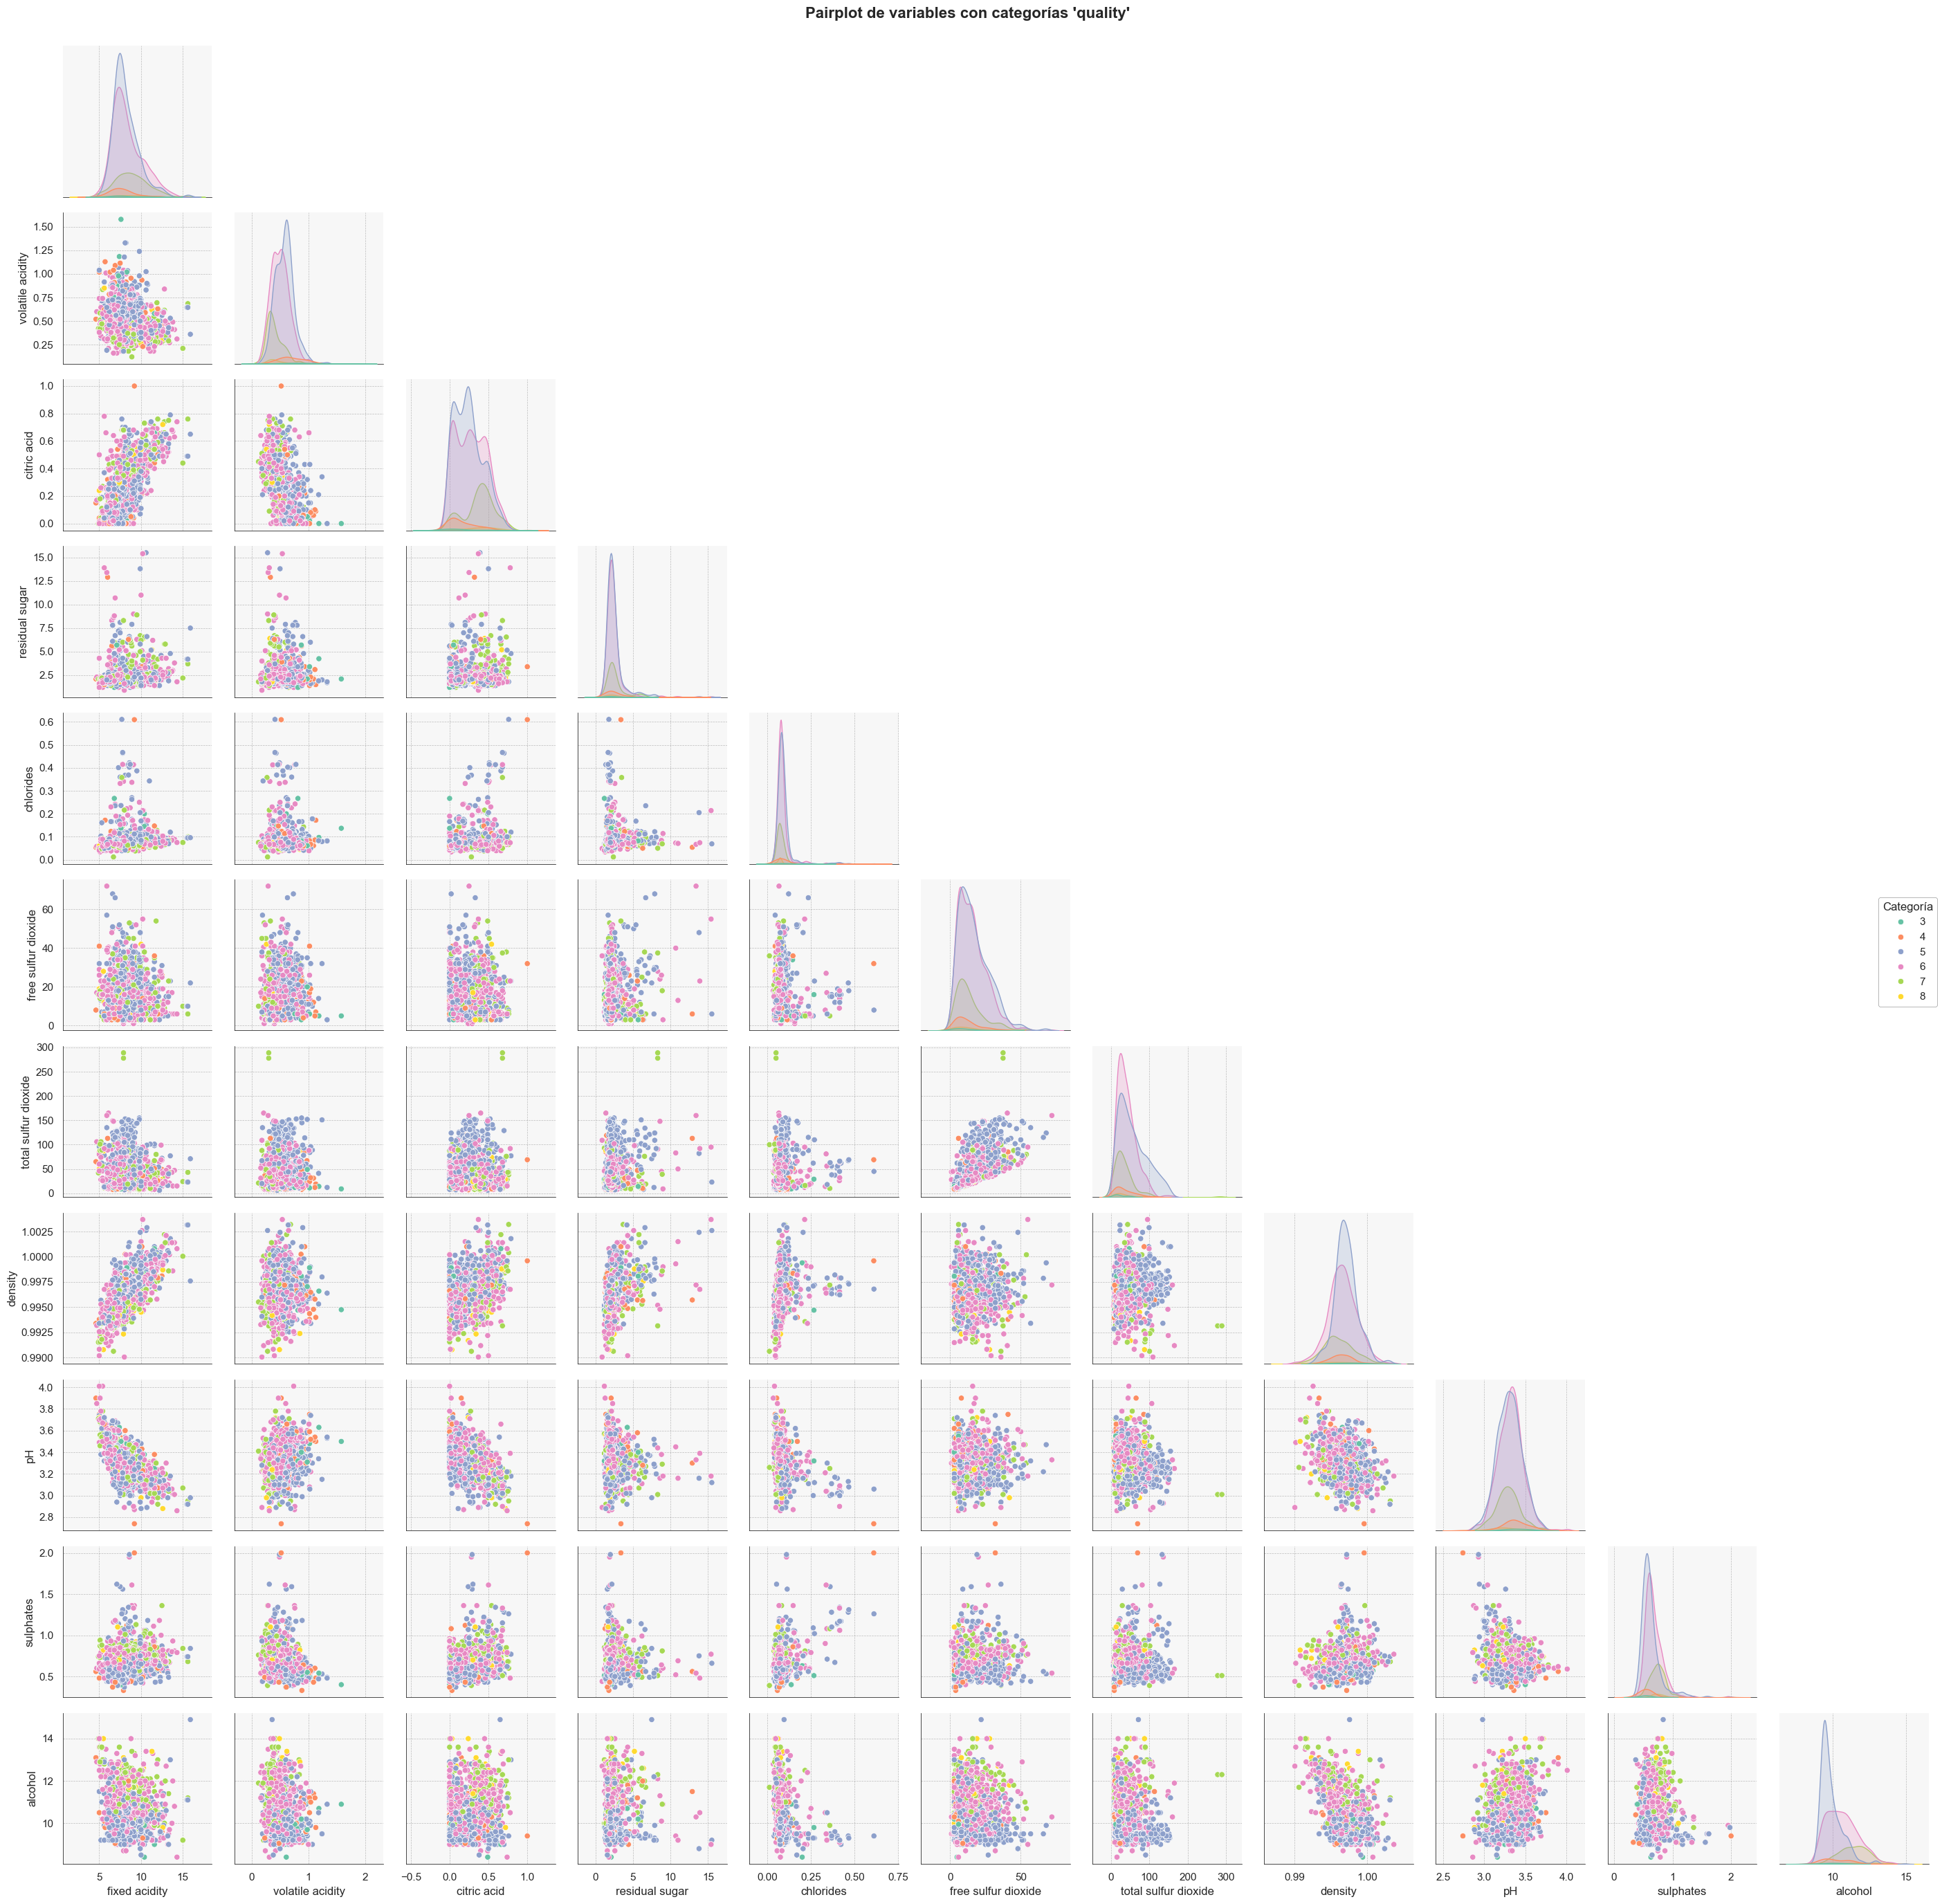

In [7]:
plt.figure(figsize=(20, 15))

# Configurar el estilo general de Seaborn
sns.set_theme(style="whitegrid", palette="Set2")

# Crear el pairplot con personalizaciones
pairplot = sns.pairplot(
    df,
    hue="quality",  # Variable para colorear las categorías
    palette="Set2",  # Paleta de colores
    diag_kind="kde",  # Mostrar densidad en la diagonal
    corner=True,  # Mostrar solo la parte inferior (para gráficos más claros)
)

# Personalizar títulos y etiquetas de ejes
pairplot.figure.suptitle(
    "Pairplot de variables con categorías 'quality'", 
    y= 1,  # Ajustar la posición del título
    fontsize=16, 
    fontweight="bold"
)

# Personalizar el fondo y líneas de los gráficos
for ax in pairplot.axes.flatten():
    if ax:  # Evitar errores en celdas vacías
        ax.set_facecolor("#f7f7f7")  # Fondo claro
        ax.spines['top'].set_color('black')  # Ocultar borde superior
        ax.spines['top'].set_linewidth(0.5)
        ax.spines['right'].set_color('black')  # Ocultar borde derecho
        ax.spines['right'].set_linewidth(0.5)
        ax.spines['left'].set_color('black')  # Grosor de bordes
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['bottom'].set_color('black')
        ax.spines['bottom'].set_linewidth(0.5)
        ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)  # Personalizar cuadrícula

# Ajustar leyenda
pairplot._legend.set_title("Categoría")  # Cambiar título de la leyenda
pairplot._legend.set_frame_on(True)  # Fondo en la leyenda
pairplot._legend.get_frame().set_edgecolor("gray")  # Borde de la leyenda
pairplot._legend.get_frame().set_linewidth(0.5)

plt.tight_layout()
plt.show()

Explicacion

#### **Verificacion de valores nulos**

In [8]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1599,0,0.0
volatile acidity,1599,0,0.0
citric acid,1599,0,0.0
residual sugar,1599,0,0.0
chlorides,1599,0,0.0
free sulfur dioxide,1599,0,0.0
total sulfur dioxide,1599,0,0.0
density,1599,0,0.0
pH,1599,0,0.0
sulphates,1599,0,0.0


#### **Verificacion de outliers**

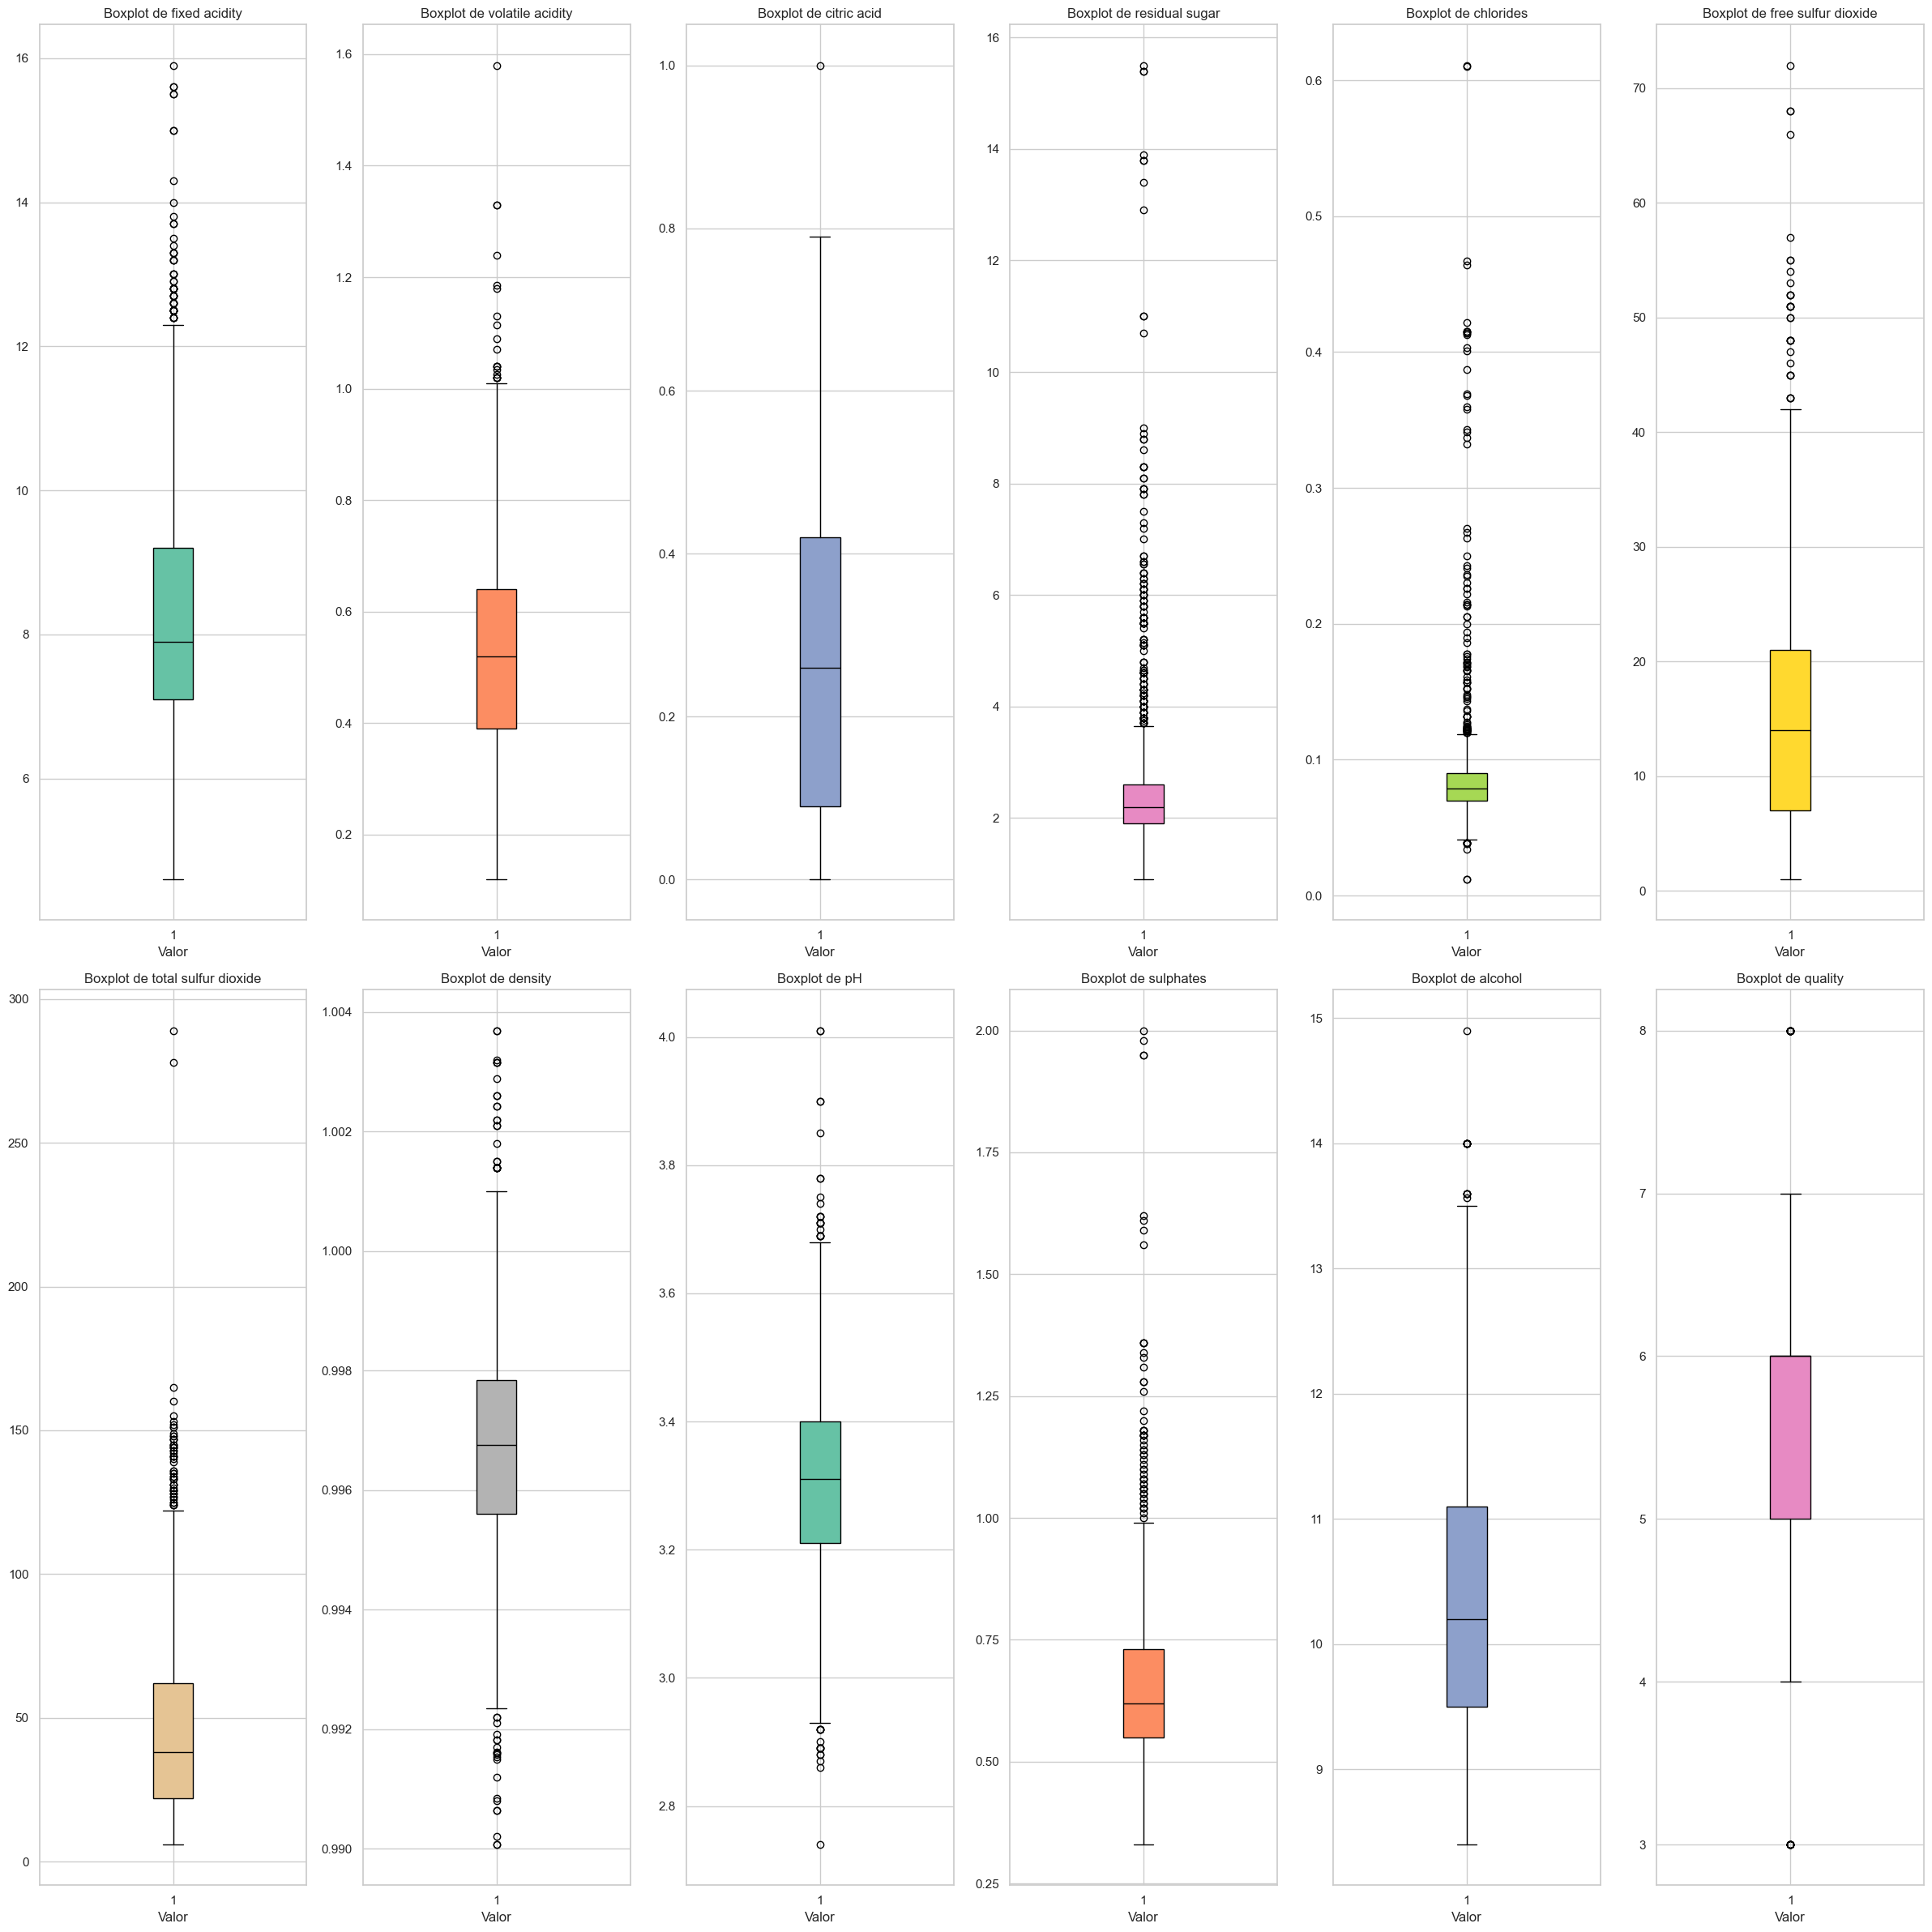

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener el número de columnas que se desean graficar
num_cols = df.select_dtypes(include=[np.number]).shape[1]  # Solo columnas numéricas

# Crear un número adecuado de subgráficos con un máximo de 6 columnas por fila
ncols = 6  # Máximo 6 columnas por fila
nrows = -(-num_cols // ncols)  # Calcular filas necesarias, redondeando hacia arriba
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 12 * nrows))
axes = axes.flatten()  # Asegurarse de que 'axes' sea un arreglo plano


# Obtener una paleta de colores de seaborn
colors = sns.color_palette("Set2", num_cols)

# Graficar cada variable en un boxplot separado
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    # Convertir la columna a numérica, forzando valores no numéricos a NaN
    datos_columna = pd.to_numeric(df[col], errors='coerce')
    
    # Graficar solo si la columna contiene datos numéricos
    if datos_columna.dropna().shape[0] > 0:  # Verificar que haya valores válidos
        # Asignar color y modificar la línea de la mediana
        axes[i].boxplot(datos_columna.dropna(), vert=True, patch_artist=True, 
                        boxprops=dict(facecolor=colors[i]),
                        medianprops=dict(color='black'))  # Línea de la mediana en negro
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_xlabel('Valor')
        axes[i].grid(True)

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [10]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in df.select_dtypes(include=[np.number]):
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
fixed acidity,41.0,3.016924,4.60000,12.300
volatile acidity,19.0,1.398087,0.12000,1.010
citric acid,1.0,0.073584,0.00000,0.790
residual sugar,126.0,9.271523,0.90000,3.650
chlorides,87.0,6.401766,0.03900,0.122
free sulfur dioxide,26.0,1.913171,1.00000,42.000
total sulfur dioxide,45.0,3.311258,6.00000,124.000
density,35.0,2.575423,0.99235,1.001
pH,28.0,2.060338,2.93000,3.680
sulphates,55.0,4.047093,0.33000,0.990


Despues de analizar los outliers visual y estadisticamente, decido no borrar los valores atipicos, pueden ser vinos exoticos con valores atipicos.

#### **Estadisticas descriptivas**

In [11]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}

# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in df:  # Seleccionar solo columnas numéricas
    datos_columna = pd.to_numeric(df[columna], errors='coerce')  # Convertir valores no numéricos a NaN
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas

# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]

# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)

# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df



Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
fixed acidity,1599.0,8.32,7.90,1.74,4.60,15.90,7.10,9.20
volatile acidity,1599.0,0.53,0.52,0.18,0.12,1.58,0.39,0.64
citric acid,1599.0,0.27,0.26,0.19,0.00,1.00,0.09,0.42
residual sugar,1599.0,2.54,2.20,1.41,0.90,15.50,1.90,2.60
chlorides,1599.0,0.09,0.08,0.05,0.01,0.61,0.07,0.09
free sulfur dioxide,1599.0,15.87,14.00,10.46,1.00,72.00,7.00,21.00
total sulfur dioxide,1599.0,46.47,38.00,32.90,6.00,289.00,22.00,62.00
density,1599.0,1.00,1.00,0.00,0.99,1.00,1.00,1.00
pH,1599.0,3.31,3.31,0.15,2.74,4.01,3.21,3.40
sulphates,1599.0,0.66,0.62,0.17,0.33,2.00,0.55,0.73


### **Preprocesamiento**

Configuramos las variables predictoras y la variable objetivo

In [12]:
# Preprocesamiento de datos
X = df.drop("quality", axis=1)
y = df['quality']

# Escalar los datos para tener media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Mostrar un resumen de los datos escalados
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_scaled.mean(axis=0)[:5]}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_scaled.std(axis=0)[:5]}")

Resumen de datos escalados:
Media por característica (aproximadamente 0): [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  2.13296131e-16]
Desviación estándar por característica (aproximadamente 1): [1. 1. 1. 1. 1.]


#### **Implementacion de PCA**

Se necesitan 8 componentes principales para capturar al menos el 90% de la variabilidad.


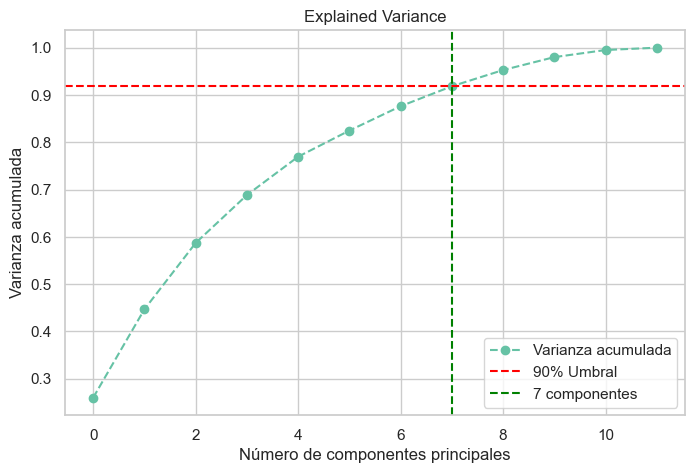

Variación explicada acumulada:
Componente 1: 26.01%
Componente 2: 44.69%
Componente 3: 58.72%
Componente 4: 68.84%
Componente 5: 76.95%
Componente 6: 82.47%
Componente 7: 87.63%
Componente 8: 91.84%
Componente 9: 95.27%
Componente 10: 98.00%
Componente 11: 99.50%
Componente 12: 100.00%


In [13]:
# 3. Implementar PCA para reducir la dimensionalidad
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determinar cuántos componentes principales se necesitan para capturar el 90% de la variabilidad
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Se necesitan {n_components} componentes principales para capturar al menos el 90% de la variabilidad.")

# 4. Visualizar la varianza explicada por cada componente
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', label='Varianza acumulada')
plt.axhline(y=0.92, color='r', linestyle='--', label='90% Umbral')
plt.axvline(x=7, color='g', linestyle='--', label='7 componentes')
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza acumulada")
plt.title("Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(cumulative_variance, 1):
    print(f"Componente {i}: {variance:.2%}")

Principales dos componentes

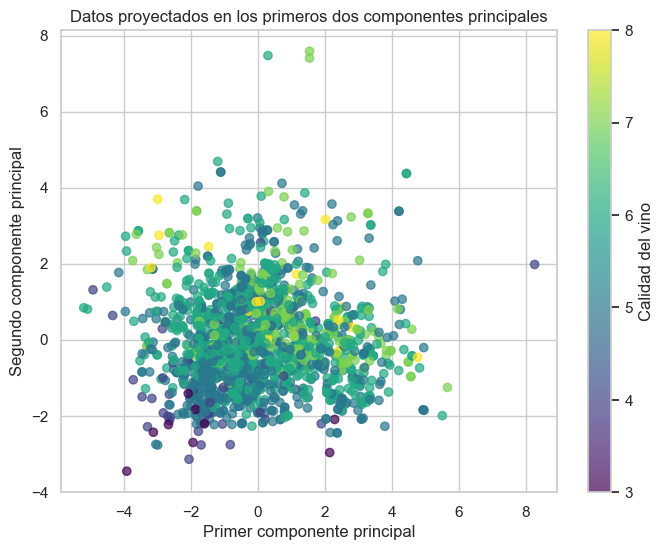

In [14]:
# 5. Visualizar los datos proyectados en los primeros dos componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=df["quality"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Calidad del vino")
plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal")
plt.title("Datos proyectados en los primeros dos componentes principales")
plt.grid(True)
plt.show()


Ganancia explicada por componente

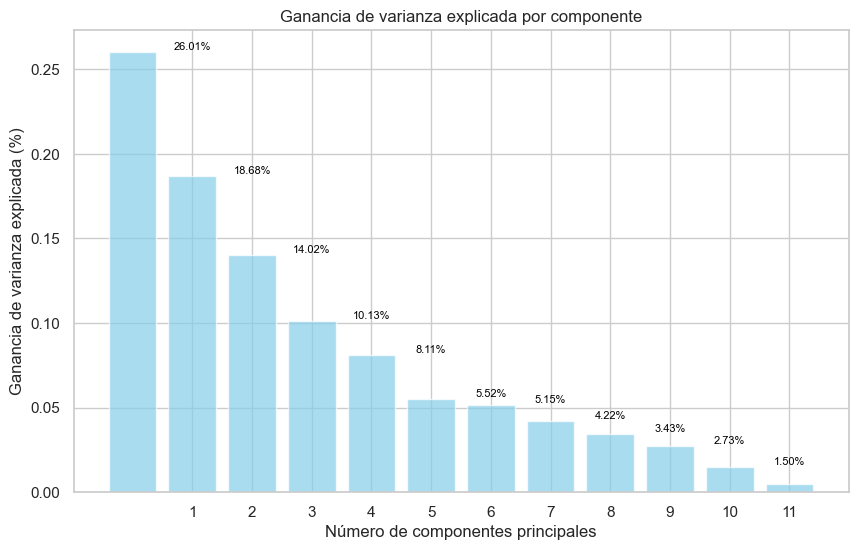

Ganancia de varianza explicada por componente:
Componente 1: 26.01%
Componente 2: 18.68%
Componente 3: 14.02%
Componente 4: 10.13%
Componente 5: 8.11%
Componente 6: 5.52%
Componente 7: 5.15%
Componente 8: 4.22%
Componente 9: 3.43%
Componente 10: 2.73%
Componente 11: 1.50%
Componente 12: 0.50%


In [15]:
explained_variance_gain = np.diff(cumulative_variance, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(12), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, 12))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
             ha='center', va='bottom', fontsize=8, color='black')
plt.grid(True)
plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")

Aplicacion de PCA

In [16]:
# Aplicar PCA con el número seleccionado de componentes
pca_final = PCA(n_components=8)
X_pca_8 = pca_final.fit_transform(X_scaled)

explained_variance = pca_final.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance[0]:.2%}")
print(f"Componente 2: {explained_variance[1]:.2%}")

# Mostrar la varianza explicada acumulada con 31 componentes
explained_variance_31 = pca_final.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 8 componentes: {explained_variance_31:.2%}")

# Dimensiones transformadas
print(f"Dimensiones originales: {X_scaled.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_8.shape[1]}")

Varianza explicada por cada componente principal:
Componente 1: 26.01%
Componente 2: 18.68%
Varianza explicada total con 8 componentes: 91.84%
Dimensiones originales: 12
Dimensiones reducidas: 8
